# Training Linear Models

$$\hat{y} = h_{\theta}(\boldsymbol{x}) = \theta \cdot \boldsymbol{x}$$


Create a function and a feature vector to show examples

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of instances to create
m = 100

# Create a column vector for the feature
X = 2 * np.random.rand(m, 1)

# Create a function with some random noise
y = 4 + 3*X + np.random.randn(m, 1)

In [6]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

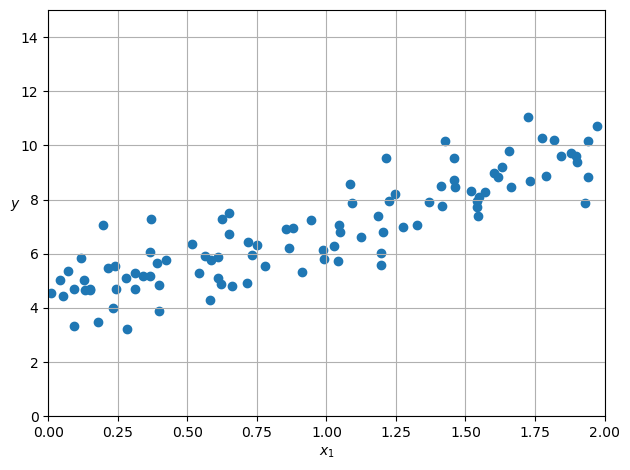

In [11]:
plt.scatter(x=X, y=y)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
plt.close()

In [13]:
# We can setup our own computations for the regression coefficients
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # Prepends a column vector of all 1s for the first constant term x_0
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

Notice how the dummy feature method added the column vector with all 1's so that we can use this with our linear combinations. We can use this along with the normal equation to calculate the best $\theta$, or $\hat{x}$, for the problem.


# $$\hat{\theta} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X^T}\boldsymbol{y}$$

Where $\boldsymbol{X}$ is a matrix of with dimensions $m \times n$

In [14]:
# We can use the linear algebra library of numpy for these calcs
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

While we don't get the exact coefficients, we still get close. This is due in part to the fact that we must consider the irreducible error for the system we're trying to solve. The irreducible error is also referred to as $\epsilon$

In [16]:
# We can use theta to try and make predictions on new feature sets
X_new = np.array([[0], [2], [4]])

# I believe the author chooses b to represent the bias term with the 1, as it will be the coeff of \theta_0
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.],
       [1., 4.]])

In [17]:
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.21509616],
       [ 9.75532293],
       [15.2955497 ]])

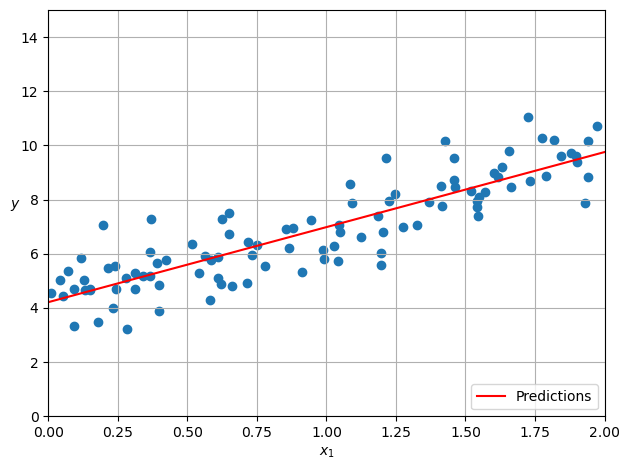

In [18]:
# We can plot against the original datapoints to see how close our fit is
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(x=X, y=y)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
# We can accomplish the exact same thing with the base LinReg model from sklearn
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [20]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293],
       [15.2955497 ]])

Notice that we come up with the exact same fit. This is because the Linear Regression approach is formulaic, always using the normal equation to fit the best line to the data. This is grounded in the concepts of column spaces and projections from Linear Algebra.